In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

import glob
import PIL
from PIL import Image
import os
import cv2

2.9.2


In [ ]:

! unzip '/content/drive/MyDrive/nucleiData.zip' -d '/content/nucleiDataset/'

#Training data

In [ ]:
trainFiles = glob.glob("/content/nucleiDataset/nucleiData/nTrain/*_gray.pgm")

print(trainFiles[:10])

X_train = []
y_train = []

for filePath in trainFiles:
    X_i = Image.open(filePath)
    X_i = np.array(X_i)/255.0
    
    X_train.append(X_i)
    
    y_i = Image.open(filePath.replace("gray", "mask"))
    y_i = np.array(y_i)/255
    
    y_train.append(y_i)
    


['/content/nucleiDataset/nucleiData/nTrain/060_gray.pgm', '/content/nucleiDataset/nucleiData/nTrain/110_gray.pgm', '/content/nucleiDataset/nucleiData/nTrain/411_gray.pgm', '/content/nucleiDataset/nucleiData/nTrain/222_gray.pgm', '/content/nucleiDataset/nucleiData/nTrain/296_gray.pgm', '/content/nucleiDataset/nucleiData/nTrain/120_gray.pgm', '/content/nucleiDataset/nucleiData/nTrain/575_gray.pgm', '/content/nucleiDataset/nucleiData/nTrain/088_gray.pgm', '/content/nucleiDataset/nucleiData/nTrain/118_gray.pgm', '/content/nucleiDataset/nucleiData/nTrain/265_gray.pgm']


In [ ]:

X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(600, 128, 128)
(600, 128, 128)


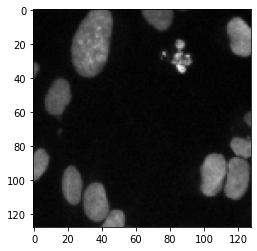

In [ ]:
plt.imshow(np.squeeze(X_train[0]), cmap='gray')
plt.show()

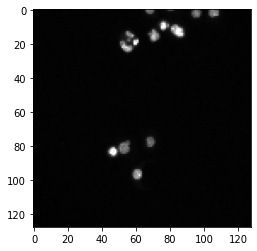

In [ ]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

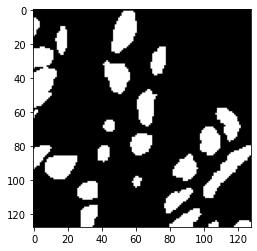

In [ ]:
plt.imshow(np.squeeze(y_train[0]), cmap='gray')
plt.show()

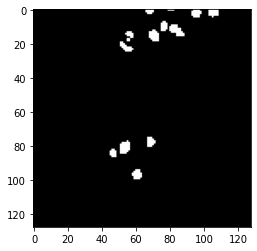

In [ ]:
plt.imshow(y_train[0], cmap='gray')
plt.show()

#Test data

In [ ]:
testFiles = glob.glob("/content/nucleiDataset/nucleiData/nTest/*_gray.pgm")

print(testFiles[:10])

X_test = []
y_test = []

for filePath in testFiles:
    X_i = Image.open(filePath)
    X_i = np.array(X_i)/255.0
    
    X_test.append(X_i)
    
    y_i = Image.open(filePath.replace("gray", "mask"))
    y_i = np.array(y_i)/255
    
    y_test.append(y_i)
    


['/content/nucleiDataset/nucleiData/nTest/637_gray.pgm', '/content/nucleiDataset/nucleiData/nTest/643_gray.pgm', '/content/nucleiDataset/nucleiData/nTest/606_gray.pgm', '/content/nucleiDataset/nucleiData/nTest/651_gray.pgm', '/content/nucleiDataset/nucleiData/nTest/657_gray.pgm', '/content/nucleiDataset/nucleiData/nTest/631_gray.pgm', '/content/nucleiDataset/nucleiData/nTest/602_gray.pgm', '/content/nucleiDataset/nucleiData/nTest/618_gray.pgm', '/content/nucleiDataset/nucleiData/nTest/649_gray.pgm', '/content/nucleiDataset/nucleiData/nTest/609_gray.pgm']


In [ ]:

X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_test.shape)
print(y_test.shape)

(70, 128, 128)
(70, 128, 128)


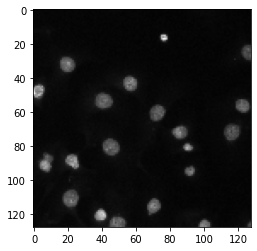

In [ ]:
plt.imshow(np.squeeze(X_test[1]), cmap='gray')
plt.show()

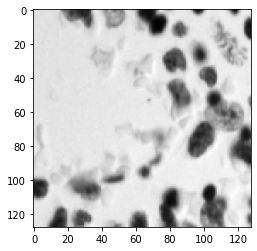

In [ ]:
plt.imshow(X_test[1], cmap='gray')
plt.show()

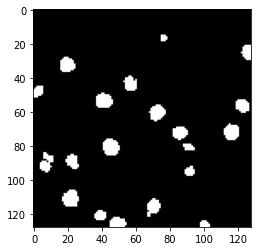

In [ ]:
plt.imshow(np.squeeze(y_test[1]), cmap='gray')
plt.show()

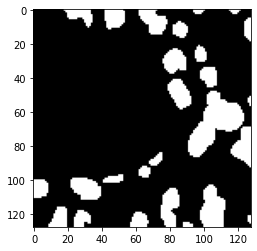

In [ ]:
plt.imshow(y_test[1], cmap='gray')
plt.show()

# The model requires the input to be 4D

np.newaxis is to add new dimension to the array. The position of the np.newaxis represents where I want to add dimensions.

a([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) : shape is (10,) \\

a[:, np.newaxis] : shape is (10,1)\\

a[np.newaxis, :] : shape is (1,10) 


numpy.repeat(a, repeats, axis=None) # Repeat elements of an array.



In [ ]:
'''
X_train = X_train[..., np.newaxis]
y_train = y_train[..., np.newaxis]


print(X_train.shape)
print(y_train.shape)
'''

X_train=np.repeat(X_train[..., np.newaxis],3,-1) #-1 indicates the last dimension, 
                                              #which indicates the axis along whic to repeat values
y_train= y_train[..., np.newaxis]
#y_train=np.repeat(y_train[..., np.newaxis],1,-1)
print(X_train.shape)
print(y_train.shape)
'''
X_test = X_test[..., np.newaxis]
y_test = y_test[..., np.newaxis]
print(X_test.shape)
print(y_test.shape)
'''
'''
X_test=np.repeat(X_test[..., np.newaxis],3,-1)
y_test=np.repeat(y_test[..., np.newaxis],1,-1)
print(X_test.shape)
print(y_test.shape)
'''

(600, 128, 128, 3)
(600, 128, 128, 1)
(70, 128, 128, 3)
(70, 128, 128, 1)


In [ ]:
'''
X_train = X_train[..., np.newaxis]
y_train = y_train[..., np.newaxis]


print(X_train.shape)
print(y_train.shape)
'''
'''
X_train=np.repeat(X_train[..., np.newaxis],3,-1) #-1 indicates the last dimension, 
                                              #which indicates the axis along whic to repeat values
y_train= y_train[..., np.newaxis]
#y_train=np.repeat(y_train[..., np.newaxis],1,-1)
print(X_train.shape)
print(y_train.shape)
'''
'''
X_test = X_test[..., np.newaxis]
y_test = y_test[..., np.newaxis]
print(X_test.shape)
print(y_test.shape)
'''

X_test=np.repeat(X_test[..., np.newaxis],3,-1)
y_test=y_test[..., np.newaxis]
print(X_test.shape)
print(y_test.shape)


(70, 128, 128, 3)
(70, 128, 128, 1)


##New attempt


In [ ]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras


In [ ]:
#https://keras.io/api/applications/



In [ ]:
from keras import applications

vgg_model = applications.VGG16(weights='imagenet',
                               include_top=False,
                               input_shape=(128, 128, 3))


58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
# Creating dictionary that maps layer names to the layers
layer_dict = dict([(layer.name, layer) for layer in vgg_model.layers])


In [ ]:
layer_dict

{'input_1': <keras.engine.input_layer.InputLayer at 0x7f84d978b670>,
 'block1_conv1': <keras.layers.convolutional.conv2d.Conv2D at 0x7f84d9799100>,
 'block1_conv2': <keras.layers.convolutional.conv2d.Conv2D at 0x7f84d9799700>,
 'block1_pool': <keras.layers.pooling.max_pooling2d.MaxPooling2D at 0x7f84d9799850>,
 'block2_conv1': <keras.layers.convolutional.conv2d.Conv2D at 0x7f84d97eeb80>,
 'block2_conv2': <keras.layers.convolutional.conv2d.Conv2D at 0x7f84d97ee670>,
 'block2_pool': <keras.layers.pooling.max_pooling2d.MaxPooling2D at 0x7f854be13cd0>,
 'block3_conv1': <keras.layers.convolutional.conv2d.Conv2D at 0x7f84d97f4e80>,
 'block3_conv2': <keras.layers.convolutional.conv2d.Conv2D at 0x7f84d97f4640>,
 'block3_conv3': <keras.layers.convolutional.conv2d.Conv2D at 0x7f84d97e23d0>,
 'block3_pool': <keras.layers.pooling.max_pooling2d.MaxPooling2D at 0x7f84d97e7d90>,
 'block4_conv1': <keras.layers.convolutional.conv2d.Conv2D at 0x7f84d97e7fa0>,
 'block4_conv2': <keras.layers.convolutional

In [ ]:
# Getting output tensor of the last VGG layer that we want to include
x = layer_dict['block2_pool'].output

In [ ]:
x1 = layer_dict['block1_conv2'].output
x2 = layer_dict['block2_conv2'].output
x3 = layer_dict['block3_conv3'].output
x4 = layer_dict['block4_conv3'].output
x5 = layer_dict['block5_conv3'].output
x6_pool= layer_dict['block5_pool'].output
u6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same') (x6_pool)
u6 = concatenate([u6, x5])

c6 = Conv2D(512, (3, 3), activation='elu',  padding='same') (u6)

c6 = Conv2D(512, (3, 3), activation='elu',  padding='same') (c6)
u7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, x4])


c7 = Conv2D(256, (3, 3), activation='elu',  padding='same') (u7)

c7 = Conv2D(256, (3, 3), activation='elu',  padding='same') (c7)
u8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, x3])

c8 = Conv2D(128, (3, 3), activation='elu',  padding='same') (u8)

c8 = Conv2D(128, (3, 3), activation='elu',  padding='same') (c8)
u9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, x2])


c9 = Conv2D(64, (3, 3), activation='elu',  padding='same') (u9)

c9 = Conv2D(64, (3, 3), activation='elu',  padding='same') (c9)
u10 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c9)
u10 = concatenate([u10, x1])

c10 = Conv2D(32, (3, 3), activation='elu' ,padding='same') (u10)

c10 = Conv2D(32, (3, 3), activation='elu', padding='same') (c10)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c10)

UNet_model = Model(inputs=[vgg_model.input], outputs=[outputs])


In [ ]:
l1 = layer_dict['block1_conv2'].output
l2 = layer_dict['block2_conv2'].output
l3 = layer_dict['block3_conv3'].output
l4 = layer_dict['block4_conv3'].output
l5 = layer_dict['block5_conv3'].output
l6_pool= layer_dict['block5_pool'].output

#Upsampling to level 5
u5 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same') (l6_pool)
u5 = concatenate([u5, l5])

c5 = Conv2D(512, (3, 3), activation='relu',  padding='same') (u5)
c5 = Conv2D(512, (3, 3), activation='relu',  padding='same') (c5)
c5 = Conv2D(512, (3, 3), activation='relu',  padding='same') (c5)

#Upsampling to level 4
u4 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same') (c5)
u4 = concatenate([u4, l4])

c4 = Conv2D(512, (3, 3), activation='relu',  padding='same') (u4)
c4 = Conv2D(512, (3, 3), activation='relu',  padding='same') (c4)
c4 = Conv2D(512, (3, 3), activation='relu',  padding='same') (c4)

#Upsampling to level 3

u3 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same') (c4)
u3 = concatenate([u3, l3])

c3 = Conv2D(256, (3, 3), activation='relu',  padding='same') (u3)
c3 = Conv2D(256, (3, 3), activation='relu',  padding='same') (c3)
c3 = Conv2D(256, (3, 3), activation='relu',  padding='same') (c3)

#Upsampling to level 2
u2 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c3)
u2 = concatenate([u2, l2])

c2 = Conv2D(128, (3, 3), activation='relu',  padding='same') (u2)
c2 = Conv2D(128, (3, 3), activation='relu',  padding='same') (c2)

#Upsampling to level 1
u1 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c2)
u1 = concatenate([u1, l1])

c1 = Conv2D(64, (3, 3), activation='relu' ,padding='same') (u1)
c1 = Conv2D(64, (3, 3), activation='relu', padding='same') (c1)

#Final 1*1 convolution 
outputs = Conv2D(1, (1, 1), activation='sigmoid') (c1)

UNet_model = Model(inputs=[vgg_model.input], outputs=[outputs])


In [ ]:
UNet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 128, 128, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 128, 128, 64  36928       ['block1_conv1[0][0]']           
                                )                                                             

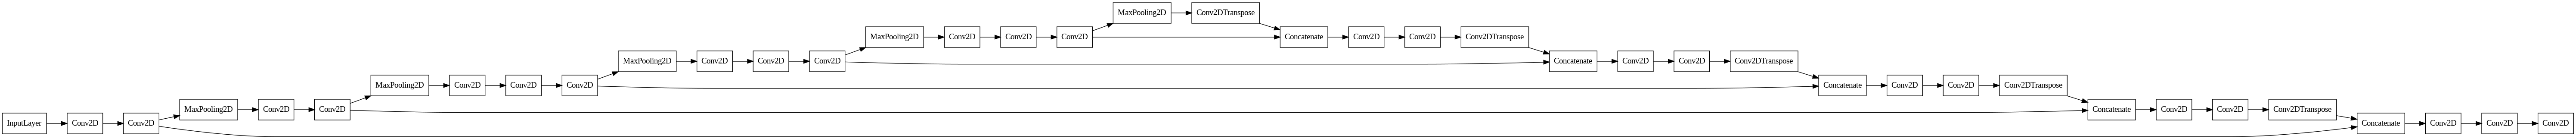

In [ ]:
tf.keras.utils.plot_model(
    UNet_model,
    to_file='UNet_model.png',
    show_shapes=False,
    show_layer_names=False,
    rankdir='LR',
    expand_nested=False,
    dpi=96
)

In [ ]:
UNet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_model = UNet_model.fit(X_train, y_train, validation_split=0.1, batch_size=32, epochs=50)

Epoch 1/50
17/17 [==============================] - 28s 697ms/step - loss: 0.5316 - accuracy: 0.8087 - val_loss: 0.4135 - val_accuracy: 0.8455
Epoch 2/50
17/17 [==============================] - 5s 268ms/step - loss: 0.3611 - accuracy: 0.8630 - val_loss: 0.3589 - val_accuracy: 0.8484
Epoch 3/50
17/17 [==============================] - 5s 270ms/step - loss: 0.2814 - accuracy: 0.8797 - val_loss: 0.2751 - val_accuracy: 0.8651
Epoch 4/50
17/17 [==============================] - 5s 269ms/step - loss: 0.2172 - accuracy: 0.9053 - val_loss: 0.1986 - val_accuracy: 0.9075
Epoch 5/50
17/17 [==============================] - 5s 270ms/step - loss: 0.1632 - accuracy: 0.9320 - val_loss: 0.1480 - val_accuracy: 0.9407
Epoch 6/50
17/17 [==============================] - 5s 270ms/step - loss: 0.1189 - accuracy: 0.9506 - val_loss: 0.1158 - val_accuracy: 0.9528
Epoch 7/50
17/17 [==============================] - 5s 270ms/step - loss: 0.1036 - accuracy: 0.9576 - val_loss: 0.1115 - val_accuracy: 0.9540
Epoch

In [ ]:
testLoss, testAccuracy = UNet_model.evaluate(X_test, y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss, testAccuracy))

3/3 [==============================] - 2s 772ms/step - loss: 0.0669 - accuracy: 0.9761
Test-loss: 0.066876, Test-accuracy: 0.976070


#Predicted segmentation (grayscale)

1/1 [==============================] - 0s 17ms/step


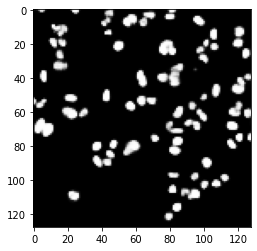

In [ ]:
m1 = UNet_model.predict(X_test[10:11])
plt.imshow(np.squeeze(m1), cmap='gray')

#Predicted segmentation (binary)

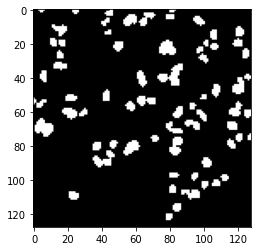

In [ ]:
prediciton_t = (m1 > 0.5).astype(np.uint8)
plt.imshow(np.squeeze(prediciton_t), cmap='gray')

#Original Input

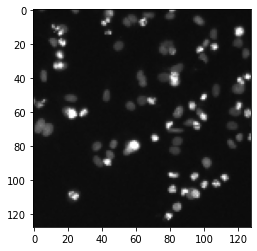

In [ ]:
plt.imshow(np.squeeze(X_test[10:11]), cmap='gray')
plt.show()

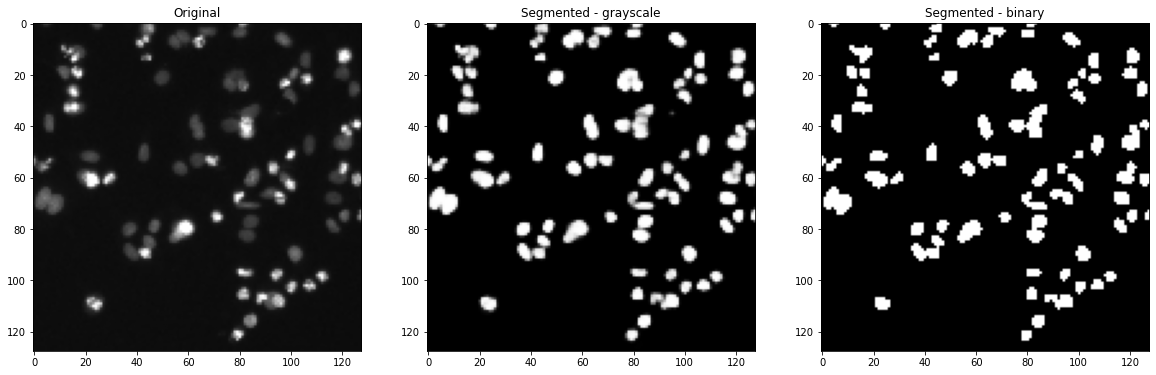

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_figheight(20)
fig.set_figwidth(20)

ax1.set_title('Original')
ax1.imshow(np.squeeze(X_test[10:11]), cmap='gray')

ax2.set_title('Segmented - grayscale')
ax2.imshow(np.squeeze(m1), cmap='gray')

ax3.set_title('Segmented - binary')
ax3.imshow(np.squeeze(prediciton_t), cmap='gray')

plt.show()

In [ ]:
X_test[10]

array([[[0.05098039, 0.05098039, 0.05098039],
        [0.05490196, 0.05490196, 0.05490196],
        [0.06666667, 0.06666667, 0.06666667],
        ...,
        [0.04705882, 0.04705882, 0.04705882],
        [0.03921569, 0.03921569, 0.03921569],
        [0.05098039, 0.05098039, 0.05098039]],

       [[0.05882353, 0.05882353, 0.05882353],
        [0.05882353, 0.05882353, 0.05882353],
        [0.06666667, 0.06666667, 0.06666667],
        ...,
        [0.04705882, 0.04705882, 0.04705882],
        [0.04705882, 0.04705882, 0.04705882],
        [0.04705882, 0.04705882, 0.04705882]],

       [[0.05098039, 0.05098039, 0.05098039],
        [0.05490196, 0.05490196, 0.05490196],
        [0.05490196, 0.05490196, 0.05490196],
        ...,
        [0.04705882, 0.04705882, 0.04705882],
        [0.04705882, 0.04705882, 0.04705882],
        [0.04705882, 0.04705882, 0.04705882]],

       ...,

       [[0.05098039, 0.05098039, 0.05098039],
        [0.05490196, 0.05490196, 0.05490196],
        [0.05490196, 0

In [ ]:
X_test[10:11]

array([[[[0.05098039, 0.05098039, 0.05098039],
         [0.05490196, 0.05490196, 0.05490196],
         [0.06666667, 0.06666667, 0.06666667],
         ...,
         [0.04705882, 0.04705882, 0.04705882],
         [0.03921569, 0.03921569, 0.03921569],
         [0.05098039, 0.05098039, 0.05098039]],

        [[0.05882353, 0.05882353, 0.05882353],
         [0.05882353, 0.05882353, 0.05882353],
         [0.06666667, 0.06666667, 0.06666667],
         ...,
         [0.04705882, 0.04705882, 0.04705882],
         [0.04705882, 0.04705882, 0.04705882],
         [0.04705882, 0.04705882, 0.04705882]],

        [[0.05098039, 0.05098039, 0.05098039],
         [0.05490196, 0.05490196, 0.05490196],
         [0.05490196, 0.05490196, 0.05490196],
         ...,
         [0.04705882, 0.04705882, 0.04705882],
         [0.04705882, 0.04705882, 0.04705882],
         [0.04705882, 0.04705882, 0.04705882]],

        ...,

        [[0.05098039, 0.05098039, 0.05098039],
         [0.05490196, 0.05490196, 0.05490196]